##### Import required modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as mpl
import seaborn as sb

##### Import medical data (.csv)

In [60]:
df = pd.read_csv("medical_examination.csv")
print(df.head(6))
print(df.shape)

   id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0   0  18393       2     168    62.0    110     80            1     1      0   
1   1  20228       1     156    85.0    140     90            3     1      0   
2   2  18857       1     165    64.0    130     70            3     1      0   
3   3  17623       2     169    82.0    150    100            1     1      0   
4   4  17474       1     156    56.0    100     60            1     1      0   
5   8  21914       1     151    67.0    120     80            2     2      0   

   alco  active  cardio  
0     0       1       0  
1     0       1       1  
2     0       0       1  
3     0       1       1  
4     0       0       0  
5     0       0       0  
(70000, 13)


##### Compute BMI and append to DF, convert to int boolean based on condition BMI > 25

In [61]:
df['overweight'] = (df['weight'] / (df['height']/100)**2  > 25).astype(int)
print(df.head(6))

   id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0   0  18393       2     168    62.0    110     80            1     1      0   
1   1  20228       1     156    85.0    140     90            3     1      0   
2   2  18857       1     165    64.0    130     70            3     1      0   
3   3  17623       2     169    82.0    150    100            1     1      0   
4   4  17474       1     156    56.0    100     60            1     1      0   
5   8  21914       1     151    67.0    120     80            2     2      0   

   alco  active  cardio  overweight  
0     0       1       0           0  
1     0       1       1           1  
2     0       0       1           0  
3     0       1       1           1  
4     0       0       0           0  
5     0       0       0           1  


##### Normalise cholesterol and glucose data to range [0,1]

In [62]:
df['cholesterol'] = df['cholesterol'].replace({1 : 0, 2 : 1, 3 : 1})
df['gluc'] = df['gluc'].replace({1 : 0, 2 : 1, 3 : 1})
print(df.head(6))

   id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0   0  18393       2     168    62.0    110     80            0     0      0   
1   1  20228       1     156    85.0    140     90            1     0      0   
2   2  18857       1     165    64.0    130     70            1     0      0   
3   3  17623       2     169    82.0    150    100            0     0      0   
4   4  17474       1     156    56.0    100     60            0     0      0   
5   8  21914       1     151    67.0    120     80            1     1      0   

   alco  active  cardio  overweight  
0     0       1       0           0  
1     0       1       1           1  
2     0       0       1           0  
3     0       1       1           1  
4     0       0       0           0  
5     0       0       0           1  


##### Reshape DF by melt()ing the relevant variables [active, alco, cholesterol, gluc, overweight, smoke]

In [177]:
df_cat = pd.melt(df, id_vars = ['cardio'], value_vars = ['active', 'alco', 'cholesterol', 'gluc', 'overweight', 'smoke'],
                 var_name = 'variable')
print(df_cat)

        cardio variable  value
0            0   active      1
1            1   active      1
2            1   active      0
3            1   active      1
4            0   active      0
...        ...      ...    ...
419995       0    smoke      1
419996       1    smoke      0
419997       1    smoke      0
419998       1    smoke      0
419999       0    smoke      0

[420000 rows x 3 columns]


##### Create coincidence charts of relevant factors, distinguishing between absence(0) / presence(1) of cardiovascular disease

<class 'matplotlib.figure.Figure'>


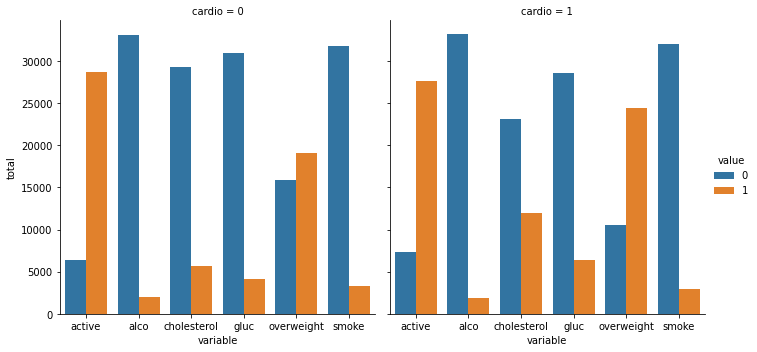

In [178]:
graph = sb.catplot(data = df_cat, kind = 'count', x = 'variable', hue = 'value', col = 'cardio')
graph.set_axis_labels("variable", "total")
fig = graph.fig 
print(type(fig))

##### Cleaning the data

In [67]:
df_heat = df[
    (df['ap_lo'] <= df['ap_hi']) &
    (df['height'] >= df['height'].quantile(0.025)) &
    (df['height'] <= df['height'].quantile(0.975)) &
    (df['weight'] >= df['weight'].quantile(0.025)) &
    (df['weight'] <= df['weight'].quantile(0.975))
]
print(df_heat.shape)

(63259, 14)


##### Generating a correlation matrix and masked heat map for the clean data

<AxesSubplot:>

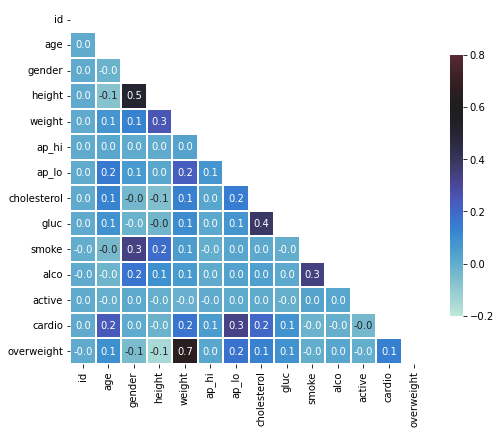

In [176]:
corr = df_heat.corr()
mask = np.triu(corr, 0)

fig, axes = mpl.subplots(figsize=(8, 8))
sb.heatmap(corr, mask = mask, vmin = -0.2, vmax = .8, center = 0.6, square = True, 
           cbar_kws = {'shrink' : 0.6}, annot = True, fmt='.1f', linewidths = 1.6) 